In [1]:
import sys
print(sys.version, sys.platform, sys.executable)

3.8.5 (default, Jan 27 2021, 15:41:15) 
[GCC 9.3.0] linux /mnt/d/spikeinterface/hussaini-to-nwb/tidy_venv/venv/bin/python3


In [2]:
'''
RecordingExtractor objects
==========================

The :code:`RecordingExtractor` is the basic class for handling recorded data. Here is how it works.
'''

import numpy as np
import spikeinterface.extractors as se

##############################################################################
# We will create a :code:`RecordingExtractor` object from scratch using :code:`numpy` and the
# :code:`NumpyRecordingExtractor`
#
# Let's define the properties of the dataset

num_channels = 7
sampling_frequency = 30000  # in Hz
duration = 20
num_timepoints = int(sampling_frequency * duration)

##############################################################################
# We can generate a pure-noise timeseries dataset recorded by a linear probe geometry

timeseries = np.random.normal(0, 10, (num_channels, num_timepoints))
geom = np.zeros((num_channels, 2))
geom[:, 0] = range(num_channels)

##############################################################################
# And instantiate a :code:`NumpyRecordingExtractor`:

recording = se.NumpyRecordingExtractor(timeseries=timeseries, geom=geom, sampling_frequency=sampling_frequency)

##############################################################################
# We can now print properties that the :code:`RecordingExtractor` retrieves from the underlying recording.

print('Num. channels = {}'.format(len(recording.get_channel_ids())))
print('Sampling frequency = {} Hz'.format(recording.get_sampling_frequency()))
print('Num. timepoints = {}'.format(recording.get_num_frames()))
print('Stdev. on third channel = {}'.format(np.std(recording.get_traces(channel_ids=2))))
print('Location of third electrode = {}'.format(recording.get_channel_property(channel_id=2, property_name='location')))

##############################################################################
# Some extractors also implement a :code:`write` function. We can for example save our newly created recording into
# MDA format (Mountainsort4 format):

se.MdaRecordingExtractor.write_recording(recording=recording, save_path='sample_mountainsort_dataset')

##############################################################################
# and read it back with the proper extractor:

recording2 = se.MdaRecordingExtractor(folder_path='sample_mountainsort_dataset')
print('Num. channels = {}'.format(len(recording2.get_channel_ids())))
print('Sampling frequency = {} Hz'.format(recording2.get_sampling_frequency()))
print('Num. timepoints = {}'.format(recording2.get_num_frames()))
print('Stdev. on third channel = {}'.format(np.std(recording2.get_traces(channel_ids=2))))
print('Location of third electrode = {}'.format(recording.get_channel_property(channel_id=2, property_name='location')))

##############################################################################
# Sometimes experiments are run with different conditions, e.g. a drug is applied, or stimulation is performed. 
# In order to define different phases of an experiment, one can use epochs:

recording2.add_epoch(epoch_name='stimulation', start_frame=1000, end_frame=6000)
recording2.add_epoch(epoch_name='post_stimulation', start_frame=6000, end_frame=10000)
recording2.add_epoch(epoch_name='pre_stimulation', start_frame=0, end_frame=1000)

recording2.get_epoch_names()

##############################################################################
# An Epoch can be retrieved and it is returned as a :code:`SubRecordingExtractor`, which is a subclass of the
# :code:`RecordingExtractor`, hence maintaining the same functionality.

recording3 = recording2.get_epoch(epoch_name='stimulation')
epoch_info = recording2.get_epoch_info('stimulation')
start_frame = epoch_info['start_frame']
end_frame = epoch_info['end_frame']

print('Epoch Name = stimulation')
print('Start Frame = {}'.format(start_frame))
print('End Frame = {}'.format(end_frame))
print('Mean. on second channel during stimulation = {}'.format(np.mean(recording3.get_traces(channel_ids=1))))
print('Location of third electrode = {}'.format(recording.get_channel_property(channel_id=2, property_name='location')))

##############################################################################
# :code:`SubRecordingExtractor` objects can be used to extract arbitrary subsets of your data/channels manually without
# epoch functionality:

recording4 = se.SubRecordingExtractor(parent_recording=recording2, channel_ids=[2, 3, 4, 5], start_frame=14000,
                                      end_frame=16000)

print('Num. channels = {}'.format(len(recording4.get_channel_ids())))
print('Sampling frequency = {} Hz'.format(recording4.get_sampling_frequency()))
print('Num. timepoints = {}'.format(recording4.get_num_frames()))
print('Stdev. on third channel = {}'.format(np.std(recording4.get_traces(channel_ids=2))))
print(
    'Location of third electrode = {}'.format(recording4.get_channel_property(channel_id=2, property_name='location')))

##############################################################################
# or to remap the channel ids:

recording5 = se.SubRecordingExtractor(parent_recording=recording2, channel_ids=[2, 3, 4, 5],
                                      renamed_channel_ids=[0, 1, 2, 3],
                                      start_frame=14000, end_frame=16000)
print('New ids = {}'.format(recording5.get_channel_ids()))
print('Original ids = {}'.format(recording5.get_original_channel_ids([0, 1, 2, 3])))
print('Num. channels = {}'.format(len(recording5.get_channel_ids())))
print('Sampling frequency = {} Hz'.format(recording5.get_sampling_frequency()))
print('Num. timepoints = {}'.format(recording5.get_num_frames()))
print('Stdev. on third channel = {}'.format(np.std(recording5.get_traces(channel_ids=0))))
print(
    'Location of third electrode = {}'.format(recording5.get_channel_property(channel_id=0, property_name='location')))


ModuleNotFoundError: No module named 'spikeinterface'

In [4]:
import spikeextractors

In [5]:
from spikeextractors.extractors.neoextractors.neobaseextractor import NeoBaseRecordingExtractor, NeoBaseSortingExtractor
from spikeextractors.extractors.neoextractors import AxonaRecordingExtractor
#from spikeextractors.extractors.axonaunitrecordingextractor import AxonaUnitRecordingExtractor

In [10]:
# Establish filename

import os

dir_name = r'../../freelance-work/catalyst-neuro/hussaini-lab-to-nwb/example_data_raw'
base_filename = 'axona_raw_5s'
filename = os.path.join(dir_name, base_filename)

In [11]:
chan_ids = [str(i) for i in range(16)]
print(chan_ids)
chan_ids = np.array([int(i) for i in chan_ids])
print(chan_ids)
np.unique(chan_ids).size
chan_ids.size

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15']
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]


16

In [12]:
filename

'../../freelance-work/catalyst-neuro/hussaini-lab-to-nwb/example_data_raw/axona_raw_5s'

In [13]:
# Create axona recording extractor object

axore = AxonaRecordingExtractor(filename=filename)

In [14]:
axore

In [15]:
recording = axore

In [17]:
print('Channel ids = {}'.format(recording.get_channel_ids()))
print('Num. channels = {}'.format(len(recording.get_channel_ids())))
print('Sampling frequency = {} Hz'.format(recording.get_sampling_frequency()))
print('Num. timepoints = {}'.format(recording.get_num_frames()))
print('Stdev. on third channel = {}'.format(np.std(recording.get_traces(channel_ids=2))))
print('Location of third electrode = {}'.format(recording.get_channel_property(channel_id=2, property_name='location')))

Channel ids = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
Num. channels = 16
Sampling frequency = 48000.0 Hz
Num. timepoints = 720000
Stdev. on third channel = 6875.3564453125
Location of third electrode = [nan nan]


Try to get to `seg_ann['signals'][0]['__array_annotations__']['tetrode_id']`, defined in axonarawio for python-neo

In [21]:
from neo import AxonaIO

In [22]:
axneo = AxonaIO(filename=filename)

In [23]:
axneo

AxonaIO: ../../freelance-work/catalyst-neuro/hussaini-lab-to-nwb/example_data_raw/axona_raw_5s
nb_block: 1
nb_segment:  [1]
signal_streams: [stream 0 (chans: 16)]
signal_channels: [0a, 0b, 0c, 0d ... 3a , 3b , 3c , 3d]
spike_channels: []
event_channels: []

In [37]:
from spikeextractors.extractors.neoextractors.neobaseextractor import NeoBaseRecordingExtractor

try:
    import neo

    HAVE_NEO = True
except ImportError:
    HAVE_NEO = False


class AxonaRecordingExtractor(NeoBaseRecordingExtractor):
    extractor_name = 'AxonaRecording'
    mode = 'file'
    NeoRawIOClass = 'AxonaRawIO'

    def __init__(self, **kargs):
        NeoBaseRecordingExtractor.__init__(self, **kargs)  # is this actually needed?
        self._key_properties['group'] = [i for i in range(16)]

In [38]:
axore = AxonaRecordingExtractor(filename=filename)

In [39]:
axore

In [40]:
recording = axore

In [41]:
recording.get_channel_groups()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

In [42]:
print('Channel groups:', recording.get_channel_groups())

Channel groups: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]


In [34]:
print('Channel ids = {}'.format(recording.get_channel_ids()))
print('Num. channels = {}'.format(len(recording.get_channel_ids())))
print('Sampling frequency = {} Hz'.format(recording.get_sampling_frequency()))
print('Num. timepoints = {}'.format(recording.get_num_frames()))
print('Stdev. on third channel = {}'.format(np.std(recording.get_traces(channel_ids=2))))
print('Location of third electrode = {}'.format(recording.get_channel_property(channel_id=2, property_name='location')))

Channel ids = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
Num. channels = 16
Sampling frequency = 48000.0 Hz
Num. timepoints = 720000
Stdev. on third channel = 6875.3564453125
Location of third electrode = [nan nan]


In [43]:
# find annotations:
# seg_ann['signals'][0]['__array_annotations__']['tetrode_id']

In [49]:
axneo

AxonaIO: ../../freelance-work/catalyst-neuro/hussaini-lab-to-nwb/example_data_raw/axona_raw_5s
nb_block: 1
nb_segment:  [1]
signal_streams: [stream 0 (chans: 16)]
signal_channels: [0a, 0b, 0c, 0d ... 3a , 3b , 3c , 3d]
spike_channels: []
event_channels: []

In [53]:
axneo.get_active_tetrode()

[1, 2, 3, 4]

In [ ]:
# I think the update I did with Sam actually does nto pass the new annotations through. Is that correct?
# If it is, fix and create a new PR. 

In [64]:
axneo.raw_annotations['blocks'][0]['segments'][0]['signals'][0]['__array_annotations__']['tetrode_id']

{'channel_names': array(['0a', '0b', '0c', '0d', '1a', '1b', '1c', '1d', '2a', '2b', '2c',
        '2d', '3a', '3b', '3c', '3d'], dtype='<U2'),
 'channel_ids': array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
        '13', '14', '15', '16'], dtype='<U2')}

# Try axonaunitextractor (written by Alessio)

In [14]:
# mini sample data
unit_dir_name = r'../../freelance-work/catalyst-neuro/hussaini-lab-to-nwb/example_data_units/Axona_Unit_Mode_SmallFile'
unit_base_filename = '20140815-180secs'
unit_filename = os.path.join(unit_dir_name, unit_base_filename)

# 1ms sample data
#unit_dir_name = r'../../freelance-work/catalyst-neuro/hussaini-lab-to-nwb/Axona_Tint_1ms'
#unit_base_filename = '20201004_Tint'
#unit_filename = os.path.join(unit_dir_name, unit_base_filename)

print(unit_filename)

../../freelance-work/catalyst-neuro/hussaini-lab-to-nwb/example_data_units/Axona_Unit_Mode_SmallFile/20140815-180secs


In [7]:
from spikeextractors.extraction_tools import check_get_traces_args
from spikeextractors import RecordingExtractor
from pathlib import Path
import numpy as np
from typing import Union

PathType = Union[Path, str]


try:
    import pyxona
    HAVE_PYXONA = True
except ImportError:
    HAVE_PYXONA = False


class AxonaUnitRecordingExtractor(RecordingExtractor):
    """
    Instantiates a RecordinExtractor from an Axon Unit mode file.

    Since the unit mode format only saves waveforms cutouts, the get_traces function fills in the rest of the
    recording with Gaussian uncorrelated noise

    Parameters
    ----------

    file_path: Path type
        The file path to the .set file
    noise_std: float
        Standard deviation of the Gaussian background noise
    """
    extractor_name = 'AxonaUnitRecording'
    has_default_locations = False
    has_unscaled = False
    installed = HAVE_PYXONA  # check at class level if installed or not
    is_writable = False
    mode = 'file'
    installation_mesg = "To use the AxonaUnitRecordingExtractor install pyxona: \n\n pip install pyxona\n\n"

    def __init__(self, file_path: PathType, noise_std: float = 3):
        RecordingExtractor.__init__(self)
        self._fileobj = pyxona.File(str(file_path))

        channel_ids = []
        channel_groups = []
        spike_trains = []
        channel_indexes = []
        waveforms = []
        for i, chan_grp in enumerate(self._fileobj.channel_groups):
            sample_rate = chan_grp.spike_train.sample_rate.magnitude
            if i == 0:
                self._fs = sample_rate
            spike_trains.append(np.array(chan_grp.spike_train.times.magnitude * sample_rate).astype(int))
            waveforms.append(chan_grp.spike_train.waveforms)
            channel_indexes.append([ch.index for ch in chan_grp.channels])
            for ch in chan_grp.channels:
                channel_ids.append(ch.index)
                channel_groups.append(chan_grp.channel_group_id)

        self._waveforms = waveforms
        self._spike_trains = spike_trains
        self._channel_indexes = channel_indexes
        self._channel_ids = channel_ids

        self._num_frames = int((self._fileobj._duration.magnitude * sample_rate))

        self._noise_std = noise_std

        # set groups
        self.set_channel_groups(channel_groups)

        self._kwargs = {'file_path': Path(file_path).absolute(), 'noise_std': noise_std}

    def get_channel_ids(self):
        return self._channel_ids

    def get_sampling_frequency(self):
        return self._fs

    def get_num_frames(self):
        return self._num_frames

    @check_get_traces_args
    def get_traces(self, channel_ids=None, start_frame=None, end_frame=None, return_scaled=True):
        
        num_frames_traces = end_frame - start_frame
        traces = unit._noise_std * np.random.randn(len(channel_ids), num_frames_traces)

        channel_idxs = [unit.get_channel_ids().index(ch) for ch in channel_ids]

        itrc = 0
        for (chan_idxs, spike_train, waveform) in zip(unit._channel_indexes, unit._spike_trains, unit._waveforms):

            # Find channels on tetrode to include and their indices
            chan_sublist = list(set(channel_idxs) & set(chan_idxs))
            chan_sublist_idxs = [i for i, val in enumerate(chan_idxs) if val in chan_sublist]
            nch = len(chan_sublist_idxs)

            spike_times_idxs = np.where((spike_train > start_frame) & (spike_train <= end_frame))
            spike_times_i = spike_train[spike_times_idxs]  # spike_train is in samples (so spike_times_i is too)

            waveforms_i = waveform[spike_times_idxs]
            wf_samples = waveforms_i.shape[2]

            if chan_sublist:

                for t, wf in zip(spike_times_i, waveforms_i):

                    t = t - start_frame

                    if t - wf_samples // 2 < 0:
                        traces[itrc:itrc+nch, :t + wf_samples // 2] = \
                            wf[chan_sublist_idxs, wf_samples // 2 - t:]
                    elif t + wf_samples // 2 > num_frames_traces:
                        traces[itrc:itrc+nch, t - wf_samples // 2:] = \
                            wf[chan_sublist_idxs, :num_frames_traces - (t + wf_samples // 2)]
                    else:
                        traces[itrc:itrc+nch, t - wf_samples // 2:t + wf_samples // 2] = \
                            wf[chan_sublist_idxs, :]

                itrc += nch
                
        return traces

In [8]:
unit = AxonaUnitRecordingExtractor(file_path=unit_filename+'.set')

NameError: name 'unit_filename' is not defined

In [9]:
unit._channel_indexes

NameError: name 'unit' is not defined

In [56]:
unit.get_channel_ids()

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

In [57]:
unit._spike_trains

[array([    160,    1044,    1920, ..., 8637858, 8638259, 8639425]),
 array([    530,     938,     995, ..., 8638720, 8639361, 8639423]),
 array([    928,    1182,    3472, ..., 8636569, 8637261, 8639204]),
 array([    564,    1194,    1309, ..., 8637066, 8637480, 8638778])]

In [58]:
unit._fs

array(48000.)

In [59]:
print('Num. channels = {}'.format(len(unit.get_channel_ids())))
print('Sampling frequency = {} Hz'.format(unit.get_sampling_frequency()))
print('Num. timepoints = {}'.format(unit.get_num_frames()))
print('Stdev. on third channel = {}'.format(np.std(unit.get_traces(channel_ids=2))))
print('Location of third electrode = {}'.format(unit.get_channel_property(channel_id=2, property_name='location')))

Num. channels = 16
Sampling frequency = 48000.0 Hz
Num. timepoints = 8640000
Stdev. on third channel = 17.234437878418895
Location of third electrode = [nan nan]


Should the time window where waveforms are filled in not be centered at 200 us? In the original data a spike event is cut out by taking the 200 us prior to and 800 us post-event. So the `t - wf_samples // 2:t + wf_samples // 2` might be incorrect. Plot to see whether that's the case:

In [60]:
# Get 100ms worth of traces
traces = unit.get_traces(channel_ids=2, start_frame=0, end_frame=4800)

In [61]:
import matplotlib.pyplot as plt

Tetrode has 15941 spikes over 4 electrodes with 50 samples each.


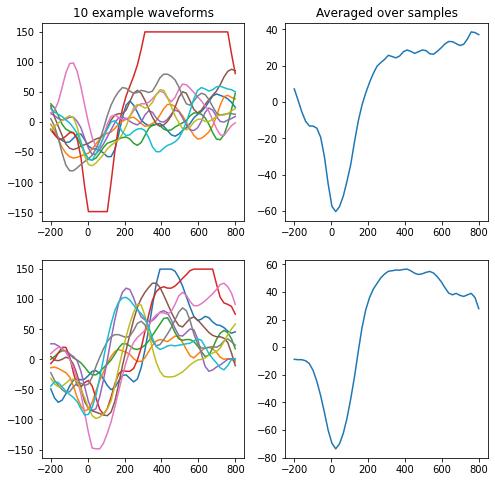

In [68]:
# Consider 1st tetrode and plot some example waveforms

tetrode_id = 0
waves = unit._waveforms[tetrode_id]
print('Tetrode has {} spikes over {} electrodes with {} samples each.'\
      .format(waves.shape[0], waves.shape[1], waves.shape[2]))

N = 10

plt.subplots(figsize=(8, 8))
ax = plt.axes()

x = np.linspace(-200, 800, 50)
for i in range(0,N):
    ax1 = plt.subplot(2, 2, 1)
    ax1.set_title("{} example waveforms".format(N))
    plt.plot(x, waves[i,1,:])
    plt.subplot(2, 2, 3)
    plt.plot(x, waves[i+N,1,:])
ax2 = plt.subplot(2, 2, 2)
ax2.set_title("Averaged over samples")
plt.plot(x, np.mean(waves[0:N,1,:], axis=0))
plt.subplot(2, 2, 4)
plt.plot(x, np.mean(waves[N+1:N+N,1,:], axis=0))

In [15]:
# From https://github.com/HussainiLab/BinConverter/blob/master/BinConverter/core/Tint_Matlab.py

def get_setfile_parameter(parameter, set_filename):
    """
    This function will return the parameter value of a given parameter name for a given set filename.
    Args:
        parameter (str): the name of the set file parameter that you want to obtain.
        set_filename (str): the full path of the .set file that you want to obtain the parameter value from.
    Returns:
        parameter_value (str): the value for the given parameter
    """

    if not os.path.exists(set_filename):
        return

    with open(set_filename, 'r+', encoding='cp1252') as f:
        for line in f:
            if parameter in line:
                if line.split(' ')[0] == parameter:
                    
                    # prevents part of the parameter being in another parameter name
                    new_line = line.strip().split(' ')
                    if len(new_line) == 2:
                        return new_line[-1]
                    else:
                        return ' '.join(new_line[1:])

In [16]:
def parse_generic_header(filename):
    """
    Given a binary file with phrases and line breaks, enters the
    first word of a phrase as dictionary key and the following
    string (without linebreaks) as value. Returns the dictionary.
    """
    header = {}
    with open(filename, 'rb') as f:
        for bin_line in f:
            if b'data_start' in bin_line:
                break
            line = bin_line.decode('cp1252').replace('\r\n', '').replace('\r', '').strip()
            parts = line.split(' ')
            key = parts[0]
            value = ' '.join(parts[1:])
            header[key] = value
            
    return header

In [17]:
set_params = parse_generic_header(unit_filename+'.set')
print(set_params['pretrigSamps'])
print(set_params['spikeLockout'])

10
40


In [18]:
pre_spike_samples = int(get_setfile_parameter('pretrigSamps', unit_filename+'.set'))
post_spike_samples = int(get_setfile_parameter('spikeLockout', unit_filename+'.set'))

In [19]:
print('samples pre-spike:', pre_spike_samples)
print('samples post-spike:', post_spike_samples)

samples pre-spike: 10
samples post-spike: 40


In [28]:
end_frame = 10000
start_frame = 0
channel_ids = [0,1,2,3,4,5,14,15]
return_scaled = True

num_frames_traces = end_frame - start_frame
traces = unit._noise_std * np.random.randn(len(channel_ids), num_frames_traces)

channel_idxs = [unit.get_channel_ids().index(ch) for ch in channel_ids]  # not used!

itrc = 0
for (chan_idxs, spike_train, waveform) in zip(unit._channel_indexes, unit._spike_trains, unit._waveforms):
    
    # Find channels on tetrode to include and their indices
    chan_sublist = list(set(channel_idxs) & set(chan_idxs))
    chan_sublist_idxs = [i for i, val in enumerate(chan_idxs) if val in chan_sublist]
    nch = len(chan_sublist_idxs)
                
    spike_times_idxs = np.where((spike_train > start_frame) & (spike_train <= end_frame))
    spike_times_i = spike_train[spike_times_idxs]  # spike_train is in samples (so spike_times_i is too)

    waveforms_i = waveform[spike_times_idxs]
    wf_samples = waveforms_i.shape[2]

    #print((chan_idxs, spike_train[0:3], waveform[0:2,0:2,0:2]))
    
    if chan_sublist:
        
        for t, wf in zip(spike_times_i, waveforms_i):
            
            print(itrc, t, chan_sublist_idxs, nch)
            
            t = t - start_frame

            if t - wf_samples // 2 < 0:
                traces[itrc:itrc+nch, :t + wf_samples // 2] = \
                    wf[chan_sublist_idxs, wf_samples // 2 - t:]
            elif t + wf_samples // 2 > num_frames_traces:
                traces[itrc:itrc+nch, t - wf_samples // 2:] = \
                    wf[chan_sublist_idxs, :num_frames_traces - (t + wf_samples // 2)]
            else:
                traces[itrc:itrc+nch, t - wf_samples // 2:t + wf_samples // 2] = \
                    wf[chan_sublist_idxs, :]
                
        itrc += nch

0 204 [0, 1, 2, 3] 4
0 361 [0, 1, 2, 3] 4
0 419 [0, 1, 2, 3] 4
0 581 [0, 1, 2, 3] 4
0 1060 [0, 1, 2, 3] 4
0 1478 [0, 1, 2, 3] 4
0 1877 [0, 1, 2, 3] 4
0 2451 [0, 1, 2, 3] 4
0 2492 [0, 1, 2, 3] 4
0 2680 [0, 1, 2, 3] 4
0 2729 [0, 1, 2, 3] 4
0 2810 [0, 1, 2, 3] 4
0 3193 [0, 1, 2, 3] 4
0 3374 [0, 1, 2, 3] 4
0 3435 [0, 1, 2, 3] 4
0 3485 [0, 1, 2, 3] 4
0 3530 [0, 1, 2, 3] 4
0 3695 [0, 1, 2, 3] 4
0 3751 [0, 1, 2, 3] 4
0 3828 [0, 1, 2, 3] 4
0 4046 [0, 1, 2, 3] 4
0 4396 [0, 1, 2, 3] 4
0 4450 [0, 1, 2, 3] 4
0 4673 [0, 1, 2, 3] 4
0 4724 [0, 1, 2, 3] 4
0 4777 [0, 1, 2, 3] 4
0 4821 [0, 1, 2, 3] 4
0 4874 [0, 1, 2, 3] 4
0 5023 [0, 1, 2, 3] 4
0 5567 [0, 1, 2, 3] 4
0 5608 [0, 1, 2, 3] 4
0 5671 [0, 1, 2, 3] 4
0 5726 [0, 1, 2, 3] 4
0 6087 [0, 1, 2, 3] 4
0 6159 [0, 1, 2, 3] 4
0 6207 [0, 1, 2, 3] 4
0 6552 [0, 1, 2, 3] 4
0 6938 [0, 1, 2, 3] 4
0 7254 [0, 1, 2, 3] 4
0 7347 [0, 1, 2, 3] 4
0 7619 [0, 1, 2, 3] 4
0 7685 [0, 1, 2, 3] 4
0 7738 [0, 1, 2, 3] 4
0 7886 [0, 1, 2, 3] 4
0 7988 [0, 1, 2, 3] 4
0 8170 [0, 1, 

# Pyxona core

In [69]:
"""
Python library for reading Axona files.
Depends on: sys
            os
            glob
            datetime
            numpy
            quantities

Authors: Svenn-Arne Dragly @CINPLA,
         Milad H. Mobarhan @CINPLA,
         Mikkel E. Lepperød @CINPLA
"""

from __future__ import division
from __future__ import print_function
from __future__ import with_statement

import sys
import quantities as pq
import os
import warnings
import glob
import numpy as np
from datetime import datetime


data_end_string = "\r\ndata_end\r\n"
data_end_length = len(data_end_string)

assert(data_end_length == 12)


def parse_attrs(text):
    attrs = {}

    for line in text.split("\n"):
        line = line.strip()

        if len(line) == 0:
            continue

        line_splitted = line.split(" ", 1)

        name = line_splitted[0]
        attrs[name] = None

        if len(line_splitted) > 1:
            try:
                attrs[name] = int(line_splitted[1])
            except:
                try:
                    attrs[name] = float(line_splitted[1])
                except:
                    attrs[name] = line_splitted[1]
    return attrs


def parse_header_and_leave_cursor(file_handle):
    header = ""
    while True:
        search_string = "data_start"
        byte = file_handle.read(1)
        header += str(byte, 'latin-1')

        if not byte:
            raise IOError("Hit end of file before '" + search_string + "' found.")

        if header[-len(search_string):] == search_string:
            break

    attrs = parse_attrs(header)

    return attrs


def assert_end_of_data(file_handle):
    remaining_data = str(file_handle.read(), 'latin1')
    assert(remaining_data.strip() == "data_end")


def scale_analog_signal(value, gain, adc_fullscale_mv, bytes_per_sample):
    """
    Takes value as raw sample data and converts it to millivolts quantity.

    The mapping in the case of bytes_per_sample = 1 is

        [-128, 127] -> [-1.0, (127.0/128.0)] * adc_fullscale_mv / gain (mV)

    The correctness of this mapping has been verified by contacting Axona.
    """
    if type(value) is np.ndarray and value.base is not None:
        raise ValueError("Value passed to scale_analog_signal cannot be a numpy view because we need to convert the entire array to a quantity.")
    max_value = 2**(8 * bytes_per_sample - 1)  # 128 when bytes_per_sample = 1
    result = (value / max_value) * (adc_fullscale_mv / gain)
    result = result
    return result


class Channel:
    def __init__(self, index, name, gain):
        self.index = index
        self.name = name
        self.gain = gain


class ChannelGroup:
    def __init__(self, channel_group_id, filename, channels, adc_fullscale, attrs):
        self.attrs = attrs
        self.filename = filename
        self.channel_group_id = channel_group_id
        self.channels = channels
        self._adc_fullscale = adc_fullscale

    @property
    def analog_signals(self):
        return self.analog_signals

    @property
    def spike_train(self):
        with open(self.filename, "rb") as f:
            attrs = parse_header_and_leave_cursor(f)

            channel_group_index = self.channel_group_id
            bytes_per_timestamp = attrs.get("bytes_per_timestamp", 4)
            bytes_per_sample = attrs.get("bytes_per_sample", 1)
            num_spikes = attrs.get("num_spikes", 0)
            num_chans = attrs.get("num_chans", 1)
            samples_per_spike = attrs.get("samples_per_spike", 50)
            timebase = int(attrs.get("timebase", "96000 hz").split(" ")[0]) * pq.Hz
            sample_rate = attrs.get("rawrate", 48000) * pq.Hz

            bytes_per_spike_without_timestamp = samples_per_spike * bytes_per_sample
            bytes_per_spike = bytes_per_spike_without_timestamp + bytes_per_timestamp

            timestamp_dtype = ">u" + str(bytes_per_timestamp)
            waveform_dtype = "<i" + str(bytes_per_sample)

            dtype = np.dtype([("times", (timestamp_dtype, 1), 1), ("waveforms", (waveform_dtype, 1), samples_per_spike)])

            data = np.fromfile(f, dtype=dtype, count=num_spikes * num_chans)
            assert_end_of_data(f)

        times = data["times"][::4] / timebase  # time for each waveform is the same, so we take each fourth time
        waveforms = data["waveforms"]
        # TODO is this the correct way to reshape waveforms?
        waveforms = waveforms.reshape(num_spikes, num_chans, samples_per_spike)
        waveforms = waveforms.astype(float)

        channel_gain_matrix = np.ones(waveforms.shape)
        for i, channel in enumerate(self.channels):
            channel_gain_matrix[:, i, :] *= channel.gain

        waveforms = scale_analog_signal(waveforms,
                                        channel_gain_matrix,
                                        self._adc_fullscale,
                                        bytes_per_sample)
        # HACK until we find the sign on the signal hafting-fyhn group always have reversed spikes
        waveforms = -waveforms
        # TODO get proper t_stop Mikkel says: isn't that just the duration, Mikkel answers: yes it is
        return SpikeTrain(
            times=times,
            waveforms=waveforms,
            spike_count=num_spikes,
            channel_count=num_chans,
            samples_per_spike=samples_per_spike,
            sample_rate=sample_rate,
            attrs=attrs
        )

    def __str__(self):
        return "<Axona channel_group {}: channel_count: {}>".format(
            self.channel_group_id, len(self.channels)
        )


class SpikeTrain:
    def __init__(self, times, waveforms,
                 spike_count, channel_count, samples_per_spike,
                 sample_rate, attrs):
        self.times = times
        self.waveforms = waveforms
        self.attrs = attrs

        assert(self.waveforms.shape[0] == spike_count)
        assert(self.waveforms.shape[1] == channel_count)
        assert(self.waveforms.shape[2] == samples_per_spike)

        self.spike_count = spike_count
        self.channel_count = channel_count
        self.samples_per_spike = samples_per_spike
        self.sample_rate = sample_rate

    @property
    def num_spikes(self):
        """
        Alias for spike_count, using same name as in .[0-9]* file.
        """
        return self.spike_count

    @property
    def num_chans(self):
        """
        Alias for channel_count, using same name as in .[0-9]* file.
        """
        return self.channel_count


class AnalogSignal:
    def __init__(self, channel_id, signal, sample_rate, attrs):
        self.channel_id = channel_id
        self.signal = signal
        self.sample_rate = sample_rate
        self.attrs = attrs

    def __str__(self):
        return "<Axona analog signal: channel: {}, shape: {}, sample_rate: {}>".format(
            self.channel_id, self.signal.shape, self.sample_rate
        )


class TrackingData:
    def __init__(self, times, positions, attrs):
        self.attrs = attrs
        self.times = times
        self.positions = positions

    def __str__(self):
        return "<Axona tracking data: times shape: {}, positions shape: {}>".format(
            self.times.shape, self.positions.shape
        )


class InpData:
    def __init__(self, duration, times, event_types, values):
        self.duration = duration
        self.times = times
        self.event_types = event_types
        self.values = values

    def __str__(self):
        return "<Axona inp data: times shape: {}>".format(self.times.shape)


class CutData:
    def __init__(self, channel_group_id, indices):
        self.channel_group_id = channel_group_id
        self.indices = indices

    def __str__(self):
        return "<Axona cut data: channel group id: {}, indices shape: {}>".format(
            self.channel_group_id, self.indices.shape
        )


class File:
    """
    Class for reading experimental data from an Axona dataset.
    """
    def __init__(self, filename):
        self._absolute_filename = filename
        self._path, relative_filename = os.path.split(filename)
        self._base_filename, extension = os.path.splitext(relative_filename)

        if extension != ".set":
            raise ValueError("file extension must be '.set'")

        with open(self._absolute_filename, mode="r", encoding="cp1252") as f:
            text = f.read()

        attrs = parse_attrs(text)

        self._adc_fullscale = float(attrs["ADC_fullscale_mv"]) * 1000.0 * pq.uV
        if all(key in attrs for key in ['trial_date', 'trial_time']):
            self._start_datetime = datetime.strptime(attrs['trial_date'] +
                                                     attrs['trial_time'],
                                                     '%A, %d %b %Y%H:%M:%S')
        else:
            self._start_datetime = None
        self._duration = float(attrs["duration"]) * pq.s
        self._tracked_spots_count = int(attrs["tracked_spots"])
        self.attrs = attrs

        self._channel_groups = []
        self._analog_signals = []
        self._cuts = []
        self._inp_data = None
        self._tracking = None

        self._channel_groups_dirty = True
        self._analog_signals_dirty = True
        self._cuts_dirty = True
        self._inp_data_dirty = True
        self._tracking_dirty = True

    @property
    def session(self):
        return self._base_filename

    @property
    def related_files(self):
        file_path = os.path.join(self._path, self._base_filename)
        cut_files = glob.glob(os.path.join(file_path + "_[0-9]*.cut"))

        return glob.glob(os.path.join(file_path + ".*")) + cut_files

    def channel_group(self, channel_id):
        if self._channel_groups_dirty:
            self._read_channel_groups()

        return self._channel_id_to_channel_group[channel_id]

    @property
    def channel_groups(self):
        if self._channel_groups_dirty:
            self._read_channel_groups()

        return self._channel_groups

    @property
    def analog_signals(self):
        if self._analog_signals_dirty:
            self._read_analog_signals()

        return self._analog_signals

    @property
    def tracking(self):
        if self._tracking_dirty:
            self._read_tracking()

        return self._tracking

    @property
    def inp_data(self):
        if self._inp_data_dirty:
            self._read_inp_data()

        return self._inp_data

    @property
    def cuts(self):
        if self._cuts_dirty:
            self._read_cuts()

        return self._cuts

    def _read_channel_groups(self):
        self._channel_id_to_channel_group = {}
        self._channel_group_id_to_channel_group = {}
        self._channel_count = 0
        self._channel_groups = []

        # TODO this file reading can be removed, perhaps?
        channel_group_filenames = glob.glob(
            os.path.join(self._path, self._base_filename) + ".[0-9]*")
        channel_group_filenames = sorted(
            channel_group_filenames,
            key=lambda x: os.path.splitext(x)[1][1:])

        _, extension = os.path.splitext(channel_group_filenames[0])
        start_channel_group = int(extension[1:]) - 1
        if start_channel_group != 0:
            warnings.warn(
                'Channel group file starts at {} '.format(start_channel_group) +
                'assumes that channel groups not saved have the same channel ' +
                'count and infers channel ids from that.')
            with open(channel_group_filenames[0], "rb") as f:
                channel_group_attrs = parse_header_and_leave_cursor(f)
                num_chans = channel_group_attrs["num_chans"]
                self._channel_count = (start_channel_group + 1) * num_chans

        for ii, channel_group_filename in enumerate(channel_group_filenames, start_channel_group):
            # increment before, because channel_groups start at 1
            basename, extension = os.path.splitext(channel_group_filename)
            channel_group_id = int(extension[1:]) - 1
            if ii != channel_group_id:
                raise IOError('Missing channel group file, unable to map channel ids')
            with open(channel_group_filename, "rb") as f:
                channel_group_attrs = parse_header_and_leave_cursor(f)
                num_chans = channel_group_attrs["num_chans"]
                channels = []
                for i in range(num_chans):
                    channel_id = self._channel_count + i
                    channel = Channel(
                        channel_id,
                        name="channel_{}_channel_group_{}_internal_{}".format(
                            channel_id, channel_group_id, i),
                        gain=self._channel_gain(channel_group_id, i)
                    )
                    channels.append(channel)

                channel_group = ChannelGroup(
                    channel_group_id,
                    filename=channel_group_filename,
                    channels=channels,
                    adc_fullscale=self._adc_fullscale,
                    attrs=channel_group_attrs
                )

                self._channel_groups.append(channel_group)
                self._channel_group_id_to_channel_group[channel_group_id] = channel_group

                for i in range(num_chans):
                    channel_id = self._channel_count + i
                    self._channel_id_to_channel_group[channel_id] = channel_group

                # increment after, because channels start at 0
                self._channel_count += num_chans

        # TODO add channels only for files that exist
        self._channel_ids = np.arange(self._channel_count)
        self._channel_groups_dirty = False

    def _channel_gain(self, channel_group_index, channel_index):
        # TODO split into two functions, one for mapping and one for gain lookup
        global_channel_index = channel_group_index * 4 + channel_index
        param_name = "gain_ch_{}".format(global_channel_index)
        return float(self.attrs[param_name])

    def _read_inp_data(self):
        """
        Reads axona .inp files.
        Event type can be 'I', 'O', or 'K' representing input,
        output, and keypress, respectively.
        The value of all event types is assumed to have dtype='>i',
        even though this is not true for keypress.
        """
        inp_filename = os.path.join(self._path, self._base_filename + ".inp")
        if not os.path.exists(inp_filename):
            raise IOError("'.inp' file not found:" + inp_filename)

        with open(inp_filename, "rb") as f:
            attrs = parse_header_and_leave_cursor(f)

            sample_rate_split = attrs["timebase"].split(" ")
            assert(sample_rate_split[1] == "hz")
            sample_rate = float(sample_rate_split[0]) * pq.Hz  # sample_rate 50.0 hz

            duration = float(attrs["duration"]) * pq.s
            num_inp_samples = int(attrs["num_inp_samples"])
            bytes_per_timestamp = int(attrs["bytes_per_timestamp"])
            bytes_per_type = int(attrs["bytes_per_type"])
            bytes_per_value = int(attrs["bytes_per_value"])

            timestamp_dtype = ">i" + str(bytes_per_timestamp)
            type_dtype = "S"
            value_dtype = 'i1'

            # read data:
            dtype = np.dtype([("t", (timestamp_dtype, 1)),
                              ("event_types", (type_dtype, bytes_per_type)),
                              ("values", (value_dtype, bytes_per_value))])

            # num_inp_samples cannot be used because it
            # does not include outputs ('O').
            # We need to find the length of the data manually
            # by seeking to the end of the file and subtracting
            # the position at data_start.
            current_position = f.tell()
            f.seek(-data_end_length, os.SEEK_END)
            end_position = f.tell()
            data_byte_count = end_position - current_position
            data_count = int(data_byte_count / dtype.itemsize)
            assert_end_of_data(f)

            # seek back to data start and read the newly calculated
            # number of samples
            f.seek(current_position, os.SEEK_SET)

            data = np.fromfile(f, dtype=dtype, count=data_count)

            assert_end_of_data(f)
            times = data["t"].astype(float) / sample_rate

            inp_data = InpData(
                duration=duration,
                times=times,
                event_types=data["event_types"].astype(str),
                values=data["values"],
            )

        self._inp_data = inp_data
        self._inp_data_dirty = False

    def _read_tracking(self):
        pos_filename = os.path.join(self._path, self._base_filename + ".pos")
        if not os.path.exists(pos_filename):
            raise IOError("'.pos' file not found:" + pos_filename)

        with open(pos_filename, "rb") as f:
            attrs = parse_header_and_leave_cursor(f)

            sample_rate_split = attrs["sample_rate"].split(" ")
            assert(sample_rate_split[1] == "hz")
            sample_rate = float(sample_rate_split[0]) * pq.Hz  # sample_rate 50.0 hz

            eeg_samples_per_position = float(attrs["EEG_samples_per_position"])
            pos_samples_count = int(attrs["num_pos_samples"])
            bytes_per_timestamp = int(attrs["bytes_per_timestamp"])
            bytes_per_coord = int(attrs["bytes_per_coord"])

            timestamp_dtype = ">i" + str(bytes_per_timestamp)
            coord_dtype = ">i" + str(bytes_per_coord)

            bytes_per_pixel_count = 4
            pixel_count_dtype = ">i" + str(bytes_per_pixel_count)

            # pos_format is as follows for this file t,x1,y1,x2,y2,numpix1,numpix2.
            data_spots_count = 2
            assert attrs['pos_format'] == 't,x1,y1,x2,y2,numpix1,numpix2', (
                'We only support the given pos format')
            # read data:
            dtype = np.dtype([("t", (timestamp_dtype, 1)),
                             ("coords", (coord_dtype, 1), 2 * data_spots_count),
                             ("pixel_count", (pixel_count_dtype, 1), data_spots_count)])

            data = np.fromfile(f, dtype=dtype, count=pos_samples_count)

            try:
                assert_end_of_data(f)
            except AssertionError:
                warnings.warn("Found remaining data while parsing pos file")

            time_scale = float(attrs["timebase"].split(" ")[0]) * pq.Hz
            times = data["t"].astype(float) / time_scale

            window_min_x = float(attrs["window_min_x"])
            window_max_x = float(attrs["window_max_x"])
            window_min_y = float(attrs["window_min_y"])
            window_max_y = float(attrs["window_max_y"])
            xsize = window_max_x - window_min_x
            ysize = window_max_y - window_min_y
            length_scale = [xsize, ysize, xsize, ysize]
            coords = data["coords"].astype(float) * pq.m
            # dacq doc: positions with value 1023 are missing
            coords[data["coords"] == 1023] = np.nan * pq.m
            for i in range(2 * data_spots_count):
                coords[:, i] /= length_scale[i]

            tracking_data = TrackingData(
                times=times,
                positions=coords,
                attrs=attrs
            )

        self._tracking = tracking_data
        self._tracking_dirty = False

    def _read_analog_signals(self):
        # TODO read for specific channel
        # TODO check that .egf file exists

        self._analog_signals = []
        eeg_basename = os.path.join(self._path, self._base_filename)
        eeg_files = glob.glob(eeg_basename + ".eeg")
        eeg_files += glob.glob(eeg_basename + ".eeg[0-9]*")
        eeg_files += glob.glob(eeg_basename + ".egf")
        eeg_files += glob.glob(eeg_basename + ".egf[0-9]*")
        for eeg_filename in sorted(eeg_files):
            extension = os.path.splitext(eeg_filename)[-1][1:]
            file_type = extension[:3]
            suffix = extension[3:]
            if suffix == "":
                suffix = "1"
            suffix = int(suffix)
            with open(eeg_filename, "rb") as f:
                try:
                    attrs = parse_header_and_leave_cursor(f)
                except OSError as e:
                    warnings.warn(str(e) + ' Unable to load "' + eeg_filename +
                                  '".')
                    continue
                attrs["raw_filename"] = eeg_filename

                if file_type == "eeg":
                    sample_count = int(attrs["num_EEG_samples"])
                elif file_type == "egf":
                    sample_count = int(attrs["num_EGF_samples"])
                else:
                    raise IOError("Unknown file type. Should be .eeg or .efg.")

                sample_rate_split = attrs["sample_rate"].split(" ")
                bytes_per_sample = attrs["bytes_per_sample"]
                assert(sample_rate_split[1].lower() == "hz")
                sample_rate = float(sample_rate_split[0]) * pq.Hz  # sample_rate 250.0 hz

                sample_dtype = (('<i' + str(bytes_per_sample), 1), attrs["num_chans"])
                data = np.fromfile(f, dtype=sample_dtype, count=sample_count)
                assert_end_of_data(f)

                eeg_final_channel_id = self.attrs["EEG_ch_" + str(suffix)] - 1 # EEG channels are counted from 1, other channels are from 0
                if eeg_final_channel_id == -1:
                    warnings.warn(
                        'eeg saved, but not reffering to any channel' +
                        ' skipping {}'.format(eeg_filename))
                    continue
                assert self.attrs["saveEEG_ch_" + str(suffix)] == 1
                eeg_mode = self.attrs["mode_ch_" + str(eeg_final_channel_id)]
                if eeg_mode == 0: # signal
                    eeg_original_channel_id = eeg_final_channel_id
                elif eeg_mode == 1: # ref
                    ref_id = self.attrs["b_in_ch_" + str(eeg_final_channel_id)]
                    eeg_original_channel_id = self.attrs["ref_" + str(ref_id)]
                elif eeg_mode == 2: # what mode is this??
                    other_channel = self.attrs["b_in_ch_" + str(eeg_final_channel_id)]
                    ref_id = self.attrs["b_in_ch_" + str(other_channel)]
                    eeg_original_channel_id = self.attrs["ref_" + str(ref_id)]
                    warnings.warn(
                        'Not sure how to retrieve original channel from mode ' +
                        '{} in {}. '.format(eeg_mode, eeg_filename) +
                        'Please make sure it is the correct gain and channel_id.')
                else:
                    warnings.warn(
                        'Not sure how to retrieve original channel from mode ' +
                        '{}, skipping {}'.format(eeg_mode, eeg_filename))
                    continue

                attrs["channel_id"] = eeg_original_channel_id

                gain = self.attrs["gain_ch_{}".format(eeg_final_channel_id)]

                signal = scale_analog_signal(data,
                                             gain,
                                             self._adc_fullscale,
                                             bytes_per_sample)

                # TODO read start time

                analog_signal = AnalogSignal(
                    channel_id=eeg_original_channel_id,
                    signal=signal,
                    sample_rate=sample_rate,
                    attrs=attrs
                )

                self._analog_signals.append(analog_signal)

        self._analog_signals_dirty = False

    def _read_cuts(self):
        self._cuts = []
        cut_basename = os.path.join(self._path, self._base_filename)
        cut_files = glob.glob(cut_basename + "_[0-9]*.cut")

        if not len(cut_files) > 0:
            raise IOError("'.cut' file(s) not found")

        for cut_filename in sorted(cut_files):
            split_basename = os.path.basename(cut_filename).split(self._base_filename+"_")[-1]
            suffix = os.path.splitext(split_basename)[0]
            try:
                channel_group_id = int(suffix) - 1  # -1 to match channel_group_id
            except ValueError as e:
                warnings.warn(str(e) + ' Unable to load cut file "' +
                              cut_filename + '".')
                continue
            lines = ""
            with open(cut_filename, "r") as f:
                for line in f:
                    if line.lstrip().startswith('Exact_cut_for'):
                        break
                lines = f.read()
                lines = lines.replace("\n", "").strip()
                indices = []
                try:
                    indices += [int(b) for b in lines.split(' ')
                                if b.isnumeric()]
                except Exception as e:
                    raise(type(e)(str(e) +
                                  " Invalid indices in cut file '" +
                                  cut_filename + "'."
                          ).with_traceback(sys.exc_info()[2]))
                cut = CutData(
                    channel_group_id=channel_group_id,
                    indices=np.asarray(indices, dtype=np.int)
                )
                self._cuts.append(cut)

        self._cuts_dirty = False


# Read data with Hussaini lab code for comparison (should give same answer)

In [30]:
# mini sample data
dir_name1 = r'../../freelance-work/catalyst-neuro/hussaini-lab-to-nwb/example_data_units/Axona_Unit_Mode_SmallFile'
base_filename1 = '20140815-180secs'
filename1 = os.path.join(dir_name1, base_filename1)

# 1ms sample data
dir_name2 = r'../../freelance-work/catalyst-neuro/hussaini-lab-to-nwb/Axona_Tint_1ms'
base_filename2 = '20201004_Tint'
filename2 = os.path.join(dir_name2, base_filename2)

print(filename1)  # shows waveform centered at ~sample 10
print(filename2)  # shows waveform centered at ~sample 25


# Set directory and filename

dir_name = dir_name2
base_filename = base_filename2

unit_set_file = os.path.join(dir_name, base_filename + '.set')
unit_eeg_file = os.path.join(dir_name, base_filename + '.eeg')
unit_pos_file = os.path.join(dir_name, base_filename + '.pos')
unit_num_file1 = os.path.join(dir_name, base_filename + '.1')
unit_num_file2 = os.path.join(dir_name, base_filename + '.2')
unit_num_file3 = os.path.join(dir_name, base_filename + '.3')
unit_num_file4 = os.path.join(dir_name, base_filename + '.4')

print('Reading UNIT data files:')
print(unit_set_file)
print(unit_eeg_file)
print(unit_pos_file)
print(unit_num_file1)
print(unit_num_file2)
print(unit_num_file3)
print(unit_num_file4)

../../freelance-work/catalyst-neuro/hussaini-lab-to-nwb/example_data_units/Axona_Unit_Mode_SmallFile/20140815-180secs
../../freelance-work/catalyst-neuro/hussaini-lab-to-nwb/Axona_Tint_1ms/20201004_Tint
Reading UNIT data files:
../../freelance-work/catalyst-neuro/hussaini-lab-to-nwb/Axona_Tint_1ms/20201004_Tint.set
../../freelance-work/catalyst-neuro/hussaini-lab-to-nwb/Axona_Tint_1ms/20201004_Tint.eeg
../../freelance-work/catalyst-neuro/hussaini-lab-to-nwb/Axona_Tint_1ms/20201004_Tint.pos
../../freelance-work/catalyst-neuro/hussaini-lab-to-nwb/Axona_Tint_1ms/20201004_Tint.1
../../freelance-work/catalyst-neuro/hussaini-lab-to-nwb/Axona_Tint_1ms/20201004_Tint.2
../../freelance-work/catalyst-neuro/hussaini-lab-to-nwb/Axona_Tint_1ms/20201004_Tint.3
../../freelance-work/catalyst-neuro/hussaini-lab-to-nwb/Axona_Tint_1ms/20201004_Tint.4


In [31]:
with open(unit_num_file1, 'rb') as f:
    data_head = f.read(800)
    
data_start = data_head.find(b'data_start') + len('data_start')
print(data_start)

314


In [32]:
print(data_head.decode('cp1252')[data_start-10:data_start])
print(data_head[data_start:])

data_start
b'\x00\x00\x01\x98 &(\'\')(\x1f\x11\x04\xfc\xf9\xf7\xf1\xe5\xdb\xd6\xd6\xd8\xe2\xf5\x0e#.0+!\x13\x00\xe9\xd5\xcf\xdc\xf3\x06\x0e\x0f\x08\xfc\xee\xe5\xe6\xef\xfb\x07\x13\x1f#\x1a\x07\x00\x00\x01\x98\x0c\r\n\x06\x06\x0e\x19 \x1c\r\xfc\xf3\xf4\xf9\xfb\xf9\xf3\xeb\xe2\xdf\xe7\xf9\n\x14\x14\x0e\x05\xff\xfb\xfb\xf9\xf4\xf0\xf2\xf6\xf7\xf6\xf6\xf9\xfb\xfa\xf6\xf3\xf5\xfd\x08\x17$)$\x00\x00\x01\x98\xfb\xec\xde\xd9\xdf\xef\x00\t\x07\x00\xfe\x00\x03\x06\x03\xff\xf8\xee\xe0\xd8\xde\xf2\x08\x15\x15\x0c\x03\x00\x05\n\x07\xff\xf8\xf6\xf7\xf9\xf9\xf5\xec\xe3\xdf\xe0\xe7\xf0\xf9\x01\n\x10\x0e\x07\x00\x00\x01\x98\xf9\xf5\xf3\xf6\x02\x13 #\x1b\x0f\x08\n\x10\r\xfc\xe6\xd6\xce\xce\xd7\xe8\xfd\x0f\x1c%)&\x18\x02\xeb\xd9\xd3\xda\xe8\xf8\x07\x12\x11\x00\xe4\xcc\xc3\xcb\xdc\xee\xfe\x0c\x15\x16\x10\x00\x00\x02\xd2\x03\x08\x08\x06\x06\x06\xff\xfc\x00\x00\x19$+) \x16\x0f\r\x0e\x13\x1a"++64.*$\x18\x18\xfc\xf5\xf5\xf9\xfe\xff\xfe\xfa\xf4\xed\xe9\xe8\xe9\xea\xeb\xeb\xed\xf1\xef\x00\x00\x02\xd2\xf5\xfd\x0

In [33]:
header = parse_generic_header(unit_num_file1)

In [34]:
header

{'trial_date': 'Sunday, 4 Oct 2020',
 'trial_time': '11:07:07',
 'experimenter': 'Abid',
 'comments': '',
 'duration': '601',
 'sw_version': '1.2.2.16',
 'num_chans': '4',
 'timebase': '96000 hz',
 'bytes_per_timestamp': '4',
 'samples_per_spike': '50',
 'sample_rate': '48000 hz',
 'bytes_per_sample': '1',
 'spike_format': 't,ch1,t,ch2,t,ch3,t,ch4',
 'num_spikes': '152938'}

In [35]:
unit_num_file1

'../../freelance-work/catalyst-neuro/hussaini-lab-to-nwb/Axona_Tint_1ms/20201004_Tint.1'

In [36]:
num_chans = int(header.get('num_chans', 4))
samples_per_spike = int(header.get('samples_per_spike', 50))
bytes_per_timestamp = int(header.get('bytes_per_timestamp', 4))
bytes_per_sample = int(header.get('bytes_per_sample', 1))
bytes_per_packet = (bytes_per_timestamp + bytes_per_sample*samples_per_spike) * num_chans

In [37]:
bytes_per_packet

216

In [38]:
time_mm = np.memmap(unit_num_file1, 
                    dtype='int'+str(int(bytes_per_timestamp)*8), 
                    mode='r', 
                    offset=data_start)

spike_mm = np.memmap(unit_num_file1, 
                     dtype='int'+str(int(bytes_per_sample)*8), 
                     mode='r', 
                     offset=data_start)

In [39]:
N = 100
offs = bytes_per_timestamp

my_waves = np.zeros((N, samples_per_spike))
for i in range(0, N):
    my_waves[i,:] = spike_mm[offs+(i*bytes_per_packet):offs+samples_per_spike+(i*bytes_per_packet)]

In [40]:
def plot_spike_waveforms(waves, N=10):

    # Consider 1st tetrode and plot some example waveforms
    plt.subplots(figsize=(8, 8))
    ax = plt.axes()

    x = np.linspace(-200, 800, 50)
    for i in range(0,N):
        ax1 = plt.subplot(2, 2, 1)
        ax1.set_title("10 example waveforms")
        plt.plot(x, waves[i,:])
    ax2 = plt.subplot(2, 2, 2)
    ax2.set_title("Averaged over samples")
    plt.plot(x, np.mean(waves[0:N,:], axis=0))

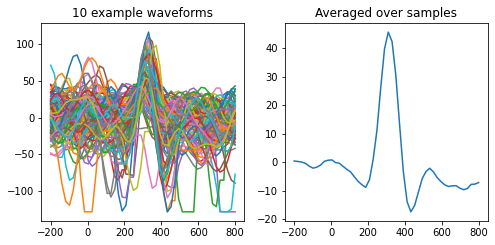

In [41]:
plot_spike_waveforms(my_waves, N=N)

Tetrode has 152938 spikes over 4 electrodes with 50 samples each.


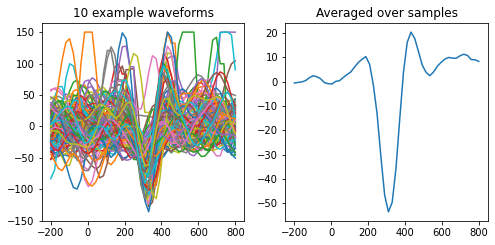

In [42]:
tetrode_id = 0
waves = unit._waveforms[tetrode_id]
print('Tetrode has {} spikes over {} electrodes with {} samples each.'\
      .format(waves.shape[0], waves.shape[1], waves.shape[2]))

plot_spike_waveforms(np.squeeze(waves[:,0,:]), N=100)

In [46]:
my_avg_wave = np.mean(my_waves[0:N,:], axis=0)
pyxona_avg_wave = np.mean(waves[0:N,0,:], axis=0)

np.array_equal(my_avg_wave, -pyxona_avg_wave)

False

In [47]:
-pyxona_avg_wave

array([  0.57421875,   0.3515625 ,   0.140625  ,  -0.41015625,
        -1.5703125 ,  -2.37890625,  -1.9921875 ,  -1.1484375 ,
         0.41015625,   0.8671875 ,   1.0078125 ,  -0.0703125 ,
        -0.36328125,  -1.65234375,  -2.87109375,  -3.9375    ,
        -5.953125  ,  -7.83984375,  -9.2109375 , -10.27734375,
        -7.125     ,   1.34765625,  13.34765625,  30.7265625 ,
        46.65234375,  53.56640625,  49.69921875,  35.89453125,
        15.64453125,  -3.7734375 , -16.1484375 , -20.34375   ,
       -17.73046875, -12.2578125 ,  -6.73828125,  -3.80859375,
        -2.42578125,  -3.94921875,  -6.26953125,  -7.921875  ,
        -9.24609375,  -9.92578125,  -9.64453125,  -9.59765625,
       -10.59375   , -11.25      , -10.76953125,  -9.05859375,
        -8.953125  ,  -8.296875  ]) * uV

In [48]:
my_avg_wave

array([  0.49,   0.3 ,   0.12,  -0.35,  -1.34,  -2.03,  -1.7 ,  -0.98,
         0.35,   0.74,   0.86,  -0.06,  -0.31,  -1.41,  -2.45,  -3.36,
        -5.08,  -6.69,  -7.86,  -8.77,  -6.08,   1.15,  11.39,  26.22,
        39.81,  45.71,  42.41,  30.63,  13.35,  -3.22, -13.78, -17.36,
       -15.13, -10.46,  -5.75,  -3.25,  -2.07,  -3.37,  -5.35,  -6.76,
        -7.89,  -8.47,  -8.23,  -8.19,  -9.04,  -9.6 ,  -9.19,  -7.73,
        -7.64,  -7.08])

In [51]:
print(2**7)
print(2**(8*2-1))

128
32768


### Unit mode

In unit mode, data is stored in 1 ms chunks, 200 μs and 800 μs after a threshold event. The header will contain a setting called “spike_format”. Generally, there are 216 bytes per spike, structured as 54 bytes per channel, in order by channel number (so, for tetrode 1, the channels are in the order 1, 2, 3, 4, or actually 1a, 1b, 1c, 1d in dacq2 nomenclature, etc.). The 54 bytes consist of a 4 byte time stamp (most significant byte first), then 50 8-bit samples. The ASCII header specifies you how many spikes there should be in the file (“num_spikes”), and the “timebase” of the timestamps (almost always 96 kHz, which means the 4-byte timestamp value needs to be divided by 96000 to get a time in seconds). The samples themselves are normally collected at 48 kHz (again, specified in the header).
Tetrode and stereotrode data is almost identical, in that both store 4-channels worth of data per spike. The only difference is that in stereotrode mode, either channels 3&4 or 1&2 will be all zeroes, corresponding to a spike on stereotrode 1 or 2, respectively (the stereotrode format is very wasteful of file space).

In [377]:
data

memmap([  0,   0,   1, ..., 100,  13,  10], dtype=int8)